# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

4. Выполнить 3 с помощью "протягиваемых" формул.

## Лабораторная работа 4.1

In [1]:
import pandas as pd
import numpy as np
import xlwings as xw

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [5]:
recipes = pd.read_csv(r'C:\Users\Саня\Downloads\lr4\recipes_sample.csv', delimiter=",", parse_dates=['submitted'], index_col = 1)
recipes = recipes[['name', 'minutes', 'submitted', 'description', 'n_ingredients']]
recipes

,name,minutes,submitted,description,n_ingredients
id,,,,,
44123,george s at the cove black bean soup,90,2002-10-25,an original recipe created by chef scott meska...,18.0
67664,healthy for them yogurt popsicles,10,2003-07-26,my children and their friends ask for my homem...,NaN
38798,i can t believe it s spinach,30,2002-08-29,"these were so go, it surprised even me.",8.0
35173,italian gut busters,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
84797,love is in the air beef fondue sauces,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...
267661,zurie s holey rustic olive and cheddar bread,80,2007-11-25,this is based on a french recipe but i changed...,10.0
386977,zwetschgenkuchen bavarian plum cake,240,2009-08-24,"this is a traditional fresh plum cake, thought...",11.0
103312,zwiebelkuchen southwest german onion cake,75,2004-11-03,this is a traditional late summer early fall s...,NaN


In [6]:
reviews = pd.read_csv(r'C:\Users\Саня\Downloads\lr4\reviews_sample.csv', delimiter=",", index_col=1)
reviews = reviews[['recipe_id', 'date', 'rating', 'review']]
reviews

,recipe_id,date,rating,review
user_id,,,,
21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...
1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [9]:
data_recipes = recipes.iloc[np.random.randint(0, len(recipes), size=int(len(recipes)*0.05))]

data_reviews = reviews.iloc[np.random.randint(0, len(reviews), size=int(len(reviews)*0.05))]
wb = xw.Book()
recipes_list = wb.sheets['Лист1']
wb.sheets['Лист1'].name = 'Рецепты'
recipes_list.range('A1').value = data_recipes
wb.sheets.add('Отзывы', after="Рецепты")
reviews_list =wb.sheets['Отзывы']
reviews_list.range('A1').value = data_reviews
wb.save(r'C:\Users\Саня\Downloads\lr4\recipes.xlsx')

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [10]:
wb = xw.Book(r'C:\Users\Саня\Downloads\lr4\recipes.xlsx')
wb.sheets[0].activate()
seconds_arr = np.array(data_recipes['minutes']*60)
seconds_arr
xw.Range((1, data_recipes.shape[1]+2)).value = 'seconds_assign'
xw.Range((2, data_recipes.shape[1]+2)).value = seconds_arr [:, np.newaxis]
wb.save()

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [11]:
wb = xw.Book(r'C:\Users\Саня\Downloads\lr4\recipes.xlsx')
wb.sheets[0].activate()
xw.Range((1, data_recipes.shape[1]+3)).value = 'seconds_formula'
index_start = xw.Range((2, data_recipes.shape[1]+3)).address
index_end = xw.Range((data_recipes.shape[0]+1, data_recipes.shape[1]+3)).address
index_minutes = xw.Range((2, data_recipes.columns.get_loc('minutes')+2))
fml = xw.Range((2, data_recipes.shape[1]+3)).formula = f'={index_minutes.address}*60'.replace("$", "")
xw.Range(f"{index_start}:{index_end}").formula = fml
wb.sheets[0].autofit()
wb.save()
wb.close()

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [12]:
wb = xw.Book(r'C:\Users\Саня\Downloads\lr4\recipes.xlsx')
wb.sheets[0].range('A1').expand('right').font.bold = True
wb.sheets[0].range('A1').expand('right').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter

wb.sheets[1].range('A1').expand('right').font.bold = True
wb.sheets[1].range('A1').expand('right').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter

wb.save()

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [13]:
wb = xw.Book(r'C:\Users\Саня\Downloads\lr4\recipes.xlsx')
rec = wb.sheets[0]
index = 2
for time in rec.range('C2').expand('down').value:
    if time < 5:
        rec.range(f'C{index}').color = (118, 255 ,3)
    elif 5 <= time <= 10:
        rec.range(f'C{index}').color = (255, 255, 0)
    else:
        rec.range(f'C{index}').color = (255, 61, 0)
    index += 1
wb.save()

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [31]:
wb = xw.Book(r'C:\Users\Саня\Downloads\lr4\recipes.xlsx')
rec = wb.sheets[0]
rev = wb.sheets[1]
rec.range('I1').value = 'n_reviews'
frm = rec.range('I2').formula = f"=COUNTIF(Отзывы!B$2:B${data_reviews.shape[0]+1}, A2)"
rec.range('I2:I1501').formula = frm
wb.save()

In [32]:
wb.close()

## Лабораторная работа 4.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [49]:
def validate(): 
    wb = xw.Book(r'C:\Users\Саня\Downloads\lr4\recipes.xlsx')
    rec = wb.sheets[0]
    rev = wb.sheets[1]
    set_id = set(rec.range('A2').expand('down').value)
    for address in range(2, len(rev.range('A2').expand('down'))+2):
        if not(0 <= rev.range(f'D{address}').value <= 5) or (rev.range(f'B{address}').value not in set_id):
            rev.range(f'A{address}').expand('right').color = (255, 61, 0)    
    wb.save()
    return

validate()

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [29]:
import csv
import xlwings as xw

data = []
with open("recipes_model.csv", encoding='utf-8') as csv_file:
    file_read = csv.reader(csv_file, delimiter='\t')
    for row in file_read:
        data.append(row)


wb = xw.Book()
model = wb.sheets[0]
model.name = 'Модель'
model.range('A2').value = data
wb.save(r'C:\Users\Саня\Downloads\lr4\recipes_model.xlsx')
wb.close()

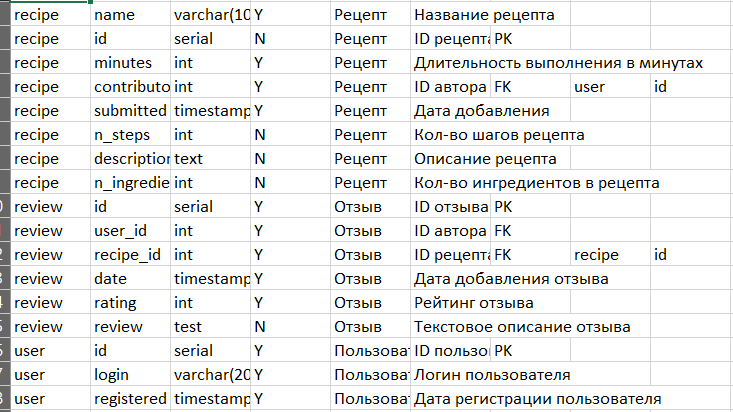

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [30]:
wb = xw.Book(r'C:\Users\Саня\Downloads\lr4\recipes_model.xlsx')
model = wb.sheets[0]
formula = f'= CONCAT(B2, " ", UPPER(C2), " ", IF(G2="PK", "PRIMARY KEY", IF(G2="FK", CONCAT("REFERENCES", " ", H2, "(", I2, ")"), "")), " ", IF(AND(D2="Y", NOT(G2="PK")), "NOT NULL", ""))'
fml = model.range('J2').formula = formula
model.range('J2:J18').formula = fml
wb.save()
wb.close()

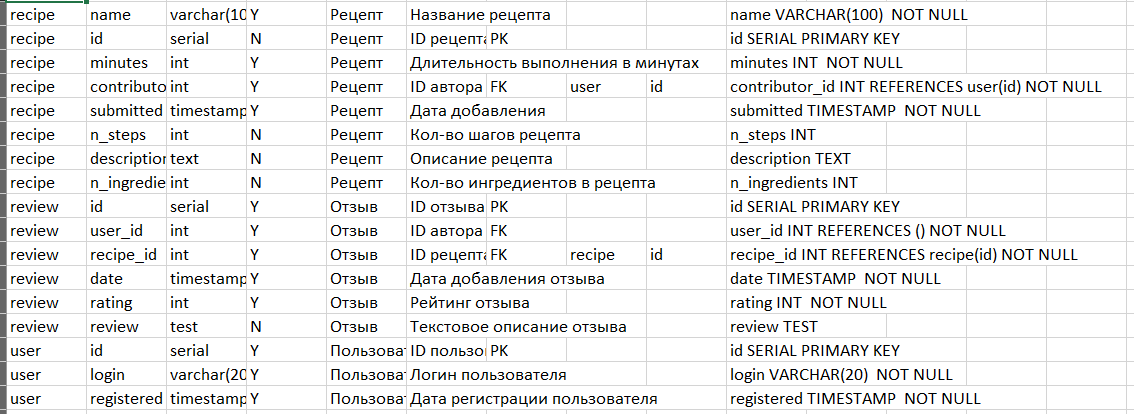

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [31]:
wb = xw.Book(r'C:\Users\Саня\Downloads\lr4\recipes_model.xlsx')
model = wb.sheets[0]
titles = ["Таблица", "Атрибут", "Тип", "Обязательно к заполнению", "Имя Таблицы", "Имя атрибута", "Ключ", "Родительское отношение", "Внешний ключ", "Формула на языке SQL"]
model.range("A1").value = titles

In [32]:
model.range("A1").expand("right").color = ('00ccff')

In [33]:
model.used_range.api.AutoFilter(Field=1)

True

In [34]:
model.range("A1").expand("right").font.bold = True

In [35]:
model.autofit('c')
wb.save()
wb.close()

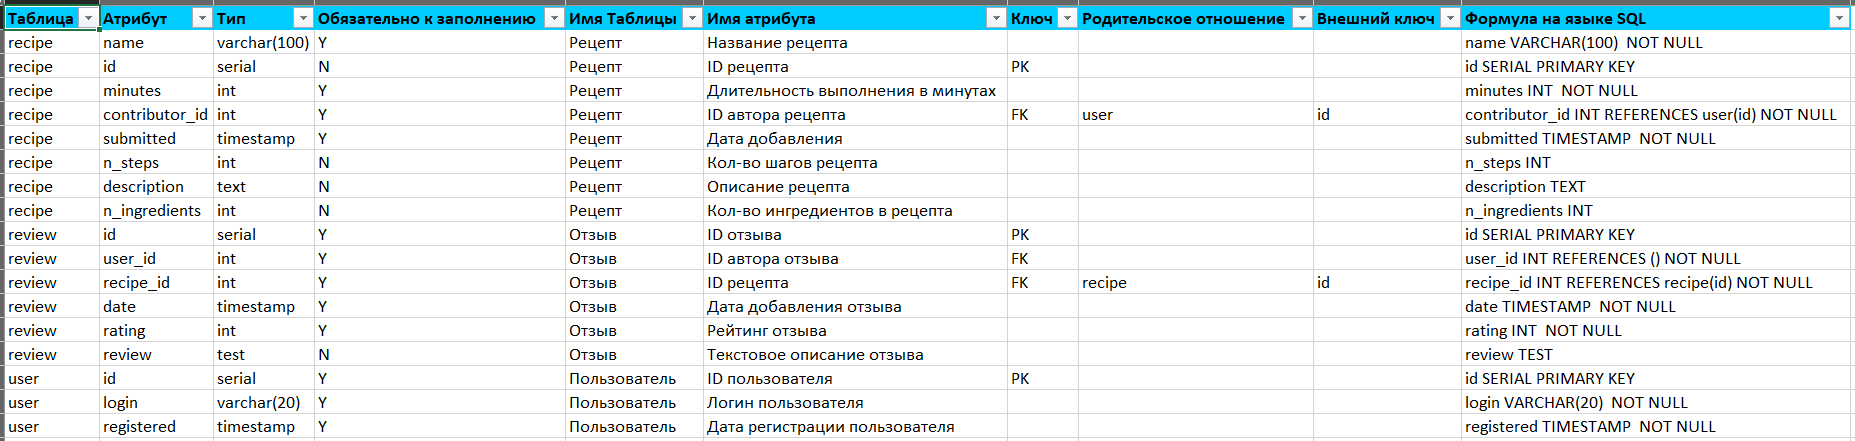

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

In [3]:
import pandas as pd
tables = pd.read_excel(r'C:\Users\Саня\Downloads\lr4\recipes_model.xlsx', usecols=[0]).value_counts()

display(tables)
data_t = [[*a, b] for a, b in tables.items()]
data_t

Таблица
recipe     8
review     6
user       3
dtype: int64

[['recipe', 8], ['review', 6], ['user', 3]]

In [37]:
wb = xw.Book(r'C:\Users\Саня\Downloads\lr4\recipes_model.xlsx')

statistic = wb.sheets.add('Статистика', after="Модель")
statistic.range("A1").value = data_t

In [38]:
df = pd.Series(dict(data_t))
plot = df.plot(kind="bar")
fig = plot.get_figure()
statistic.pictures.add(fig, name='Статистика атрибутов', top=statistic.range("E2").top,
                      left=statistic.range("E2").left)
wb.save()
wb.close()

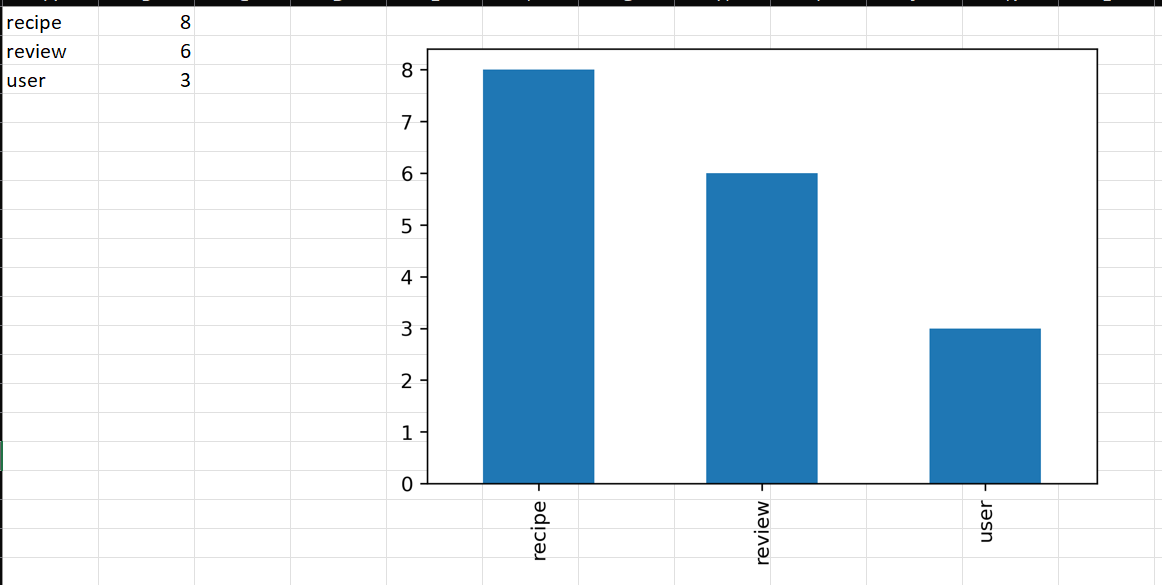
